# Stock Price Prediction

In [12]:
import numpy as np
import pandas as pd

import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
stocks = input(""" Enter the code to download i.e "CL=F GC=F" """ )
data = yf.download(stocks, "2008-01-01","2021-01-18",auto_adjust=True)
data.head()


Enter the code to download cl=f
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,96.050003,100.000000,96.050003,99.620003,227099
2008-01-03,99.230003,100.089996,98.449997,99.180000,241269
2008-01-04,99.169998,99.410004,97.099998,97.910004,231790
2008-01-07,97.790001,98.400002,94.470001,95.089996,258890
2008-01-08,95.349998,97.540001,95.260002,96.330002,287519


In [14]:
data.shape

(3282, 5)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3282 entries, 2008-01-02 to 2021-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3282 non-null   float64
 1   High    3282 non-null   float64
 2   Low     3282 non-null   float64
 3   Close   3282 non-null   float64
 4   Volume  3282 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.8 KB


In [16]:
data.describe()

,Open,High,Low,Close,Volume
count,3282.000000,3282.000000,3282.000000,3282.000000,3.282000e+03
mean,71.219616,72.280844,70.051551,71.190140,4.019855e+05
std,24.505724,24.613800,24.401277,24.555344,2.117359e+05
min,-14.000000,13.690000,-40.320000,-37.630001,4.851600e+04
25%,50.085001,51.020000,49.205001,50.059999,2.526225e+05
50%,68.305000,69.470001,67.189999,68.404999,3.358790e+05
75%,93.247499,94.137499,92.112501,93.190002,5.298455e+05
max,145.190002,147.270004,143.220001,145.289993,2.288230e+06


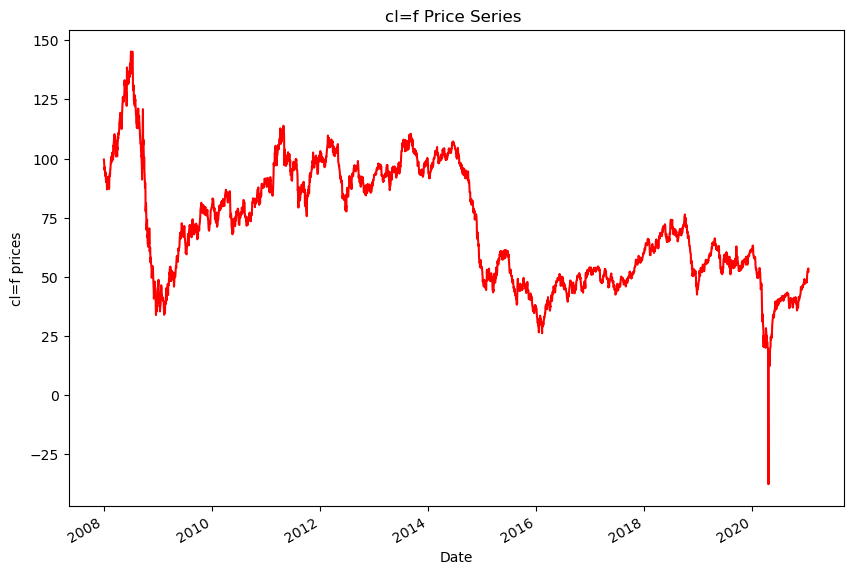

In [17]:
data.Close.plot(figsize=(10,7), color ='r')
plt.ylabel("{} prices".format(stocks))
plt.title("{} Price Series ".format(stocks))
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

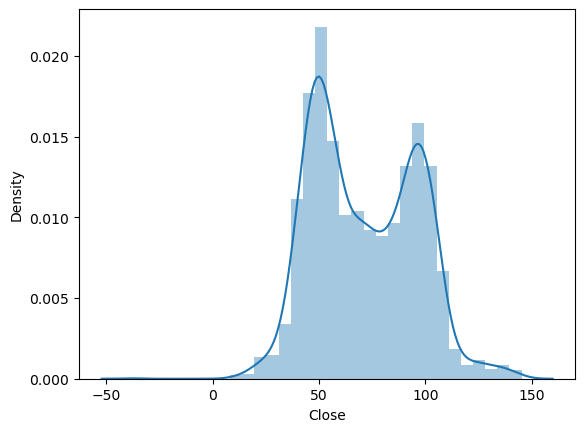

In [18]:
sns.distplot(data['Close'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Open', ylabel='Density'>

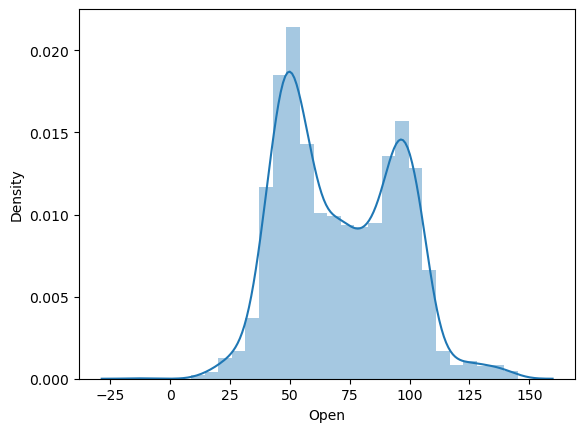

In [19]:
sns.distplot(data['Open'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='High', ylabel='Density'>

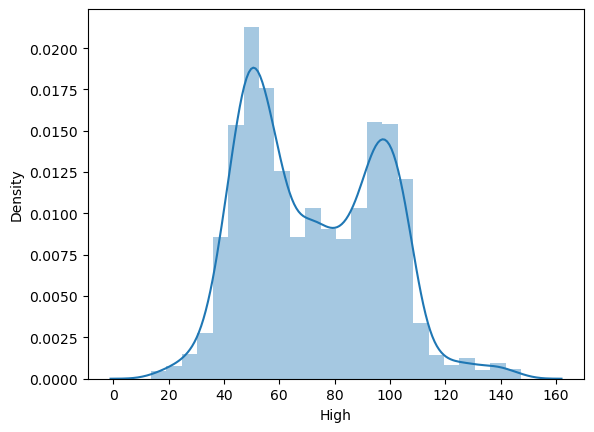

In [20]:
sns.distplot(data['High'])

In [21]:
x= data.drop('Close', axis=1)
y= data['Close']

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)

(2625, 4)
(657, 4)
(2625,)
(657, 4)


# LinearRegression


In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)


In [24]:
from sklearn.metrics import mean_squared_error, r2_score

def calculate_metics(y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2_scors = r2_score(y_test,y_pred)
    
    print('MSE', mse)
    print('RMSE', rmse)
    print('R2_score:-',r2_scors)
    
calculate_metics(y_test,lr_pred)    
    

MSE 0.37390288094788493
RMSE 0.6114759855856033
R2_score:- 0.9993942427830674


# Lasso and Ridge Regression

In [25]:
from sklearn.linear_model import Lasso, Ridge
la = Lasso().fit(x_train,y_train)
ri = Ridge().fit(x_train,y_train)

lasso_pred = la.predict(x_test)
ridge_pred = ri.predict(x_test)

In [26]:
print("Lasso \n")
calculate_metics(y_test,lasso_pred)

Lasso 

MSE 1.1462299481772888
RMSE 1.0706212907360328
R2_score:- 0.9981430015687164


In [27]:
print("Ridge \n")
calculate_metics(y_test,ridge_pred)

Ridge 

MSE 0.37408860871551786
RMSE 0.6116278351379357
R2_score:- 0.999393941886922


# SVM support vector machine

In [28]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

param_grid ={"C":[0.1,1,10,100,1000],
        'gamma':[1,0.1,0.01,0.001,0.0001],
         'kernel':['rbf']
        }
grid=GridSearchCV(SVR(),param_grid,refit=True,verbose=3)

grid.fit(x_train,y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.020 total time=   0.5s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.029 total time=   0.5s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.002 total time=   0.5s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.025 total time=   0.5s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.016 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.020 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.029 total time=   0.4s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.002 total time=   0.4s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.025 total time=   0.4s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.016 total time=   0.4s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.020 total time=   0.4s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.001 total time=   1.8s
[CV 3/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.005 total time=   1.7s
[CV 4/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.001 total time=   1.6s
[CV 5/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.000 total time=   1.6s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.004 total time=   1.7s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.003 total time=   1.6s
[CV 3/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.004 total time=   1.8s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.000 total time=   1.6s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.001 total time=   1.7s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.013 total time=   1.7s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.018 total time=   1.9s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.015 total time=   1.7s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [29]:
svr = SVR(C=10,gamma=0.01,kernel ='rbf')
svr.fit(x_train,y_train)
svr.pred=svr.predict(x_test)

##### import joblib

joblib.dump(ri,'model.pkl')

ridge_from_joblib =model= joblib.load('model.pkl')
